--- 데이터 요약 ---
  success data__accelerators__brand data__accelerators__product  \
0    True                    NVIDIA                        H100   
1     NaN                    NVIDIA                        H200   
2     NaN                    NVIDIA                        B200   
3     NaN                    NVIDIA                        B300   
4     NaN                    NVIDIA                        R100   

  data__accelerators__arch data__accelerators__spec  \
0                   Hopper                     HBM3   
1                   Hopper                    HBM3E   
2                Blackwell                    HBM3E   
3          Blackwell Ultra                    HBM3E   
4                    Rubin                     HBM4   

   data__accelerators__stacks  data__accelerators__capacity  \
0                           5                            80   
1                           6                           141   
2                           8                           192   

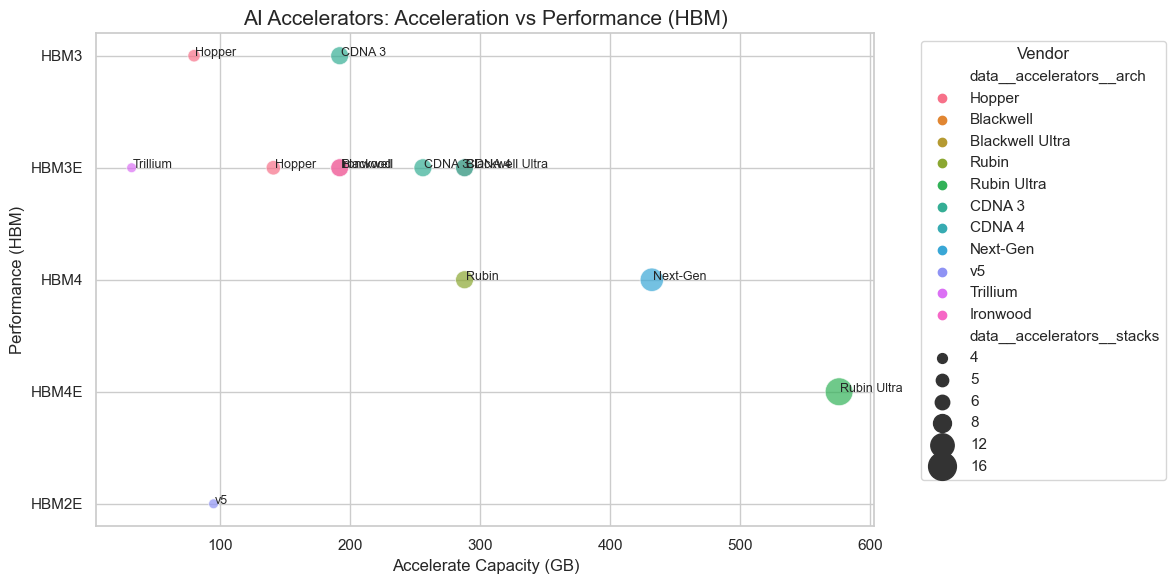


--- 제조사별 평균 성능 ---


TypeError: agg function failed [how->mean,dtype->object]

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 파일 불러오기
# 저장하신 파일명으로 이름을 바꿔주세요.
file_name = 'result_hbm.csv' 
df = pd.read_csv(file_name)

# 2. 데이터 확인 (상위 5개)
print("--- 데이터 요약 ---")
print(df.head())

# 3. 그래프 그리기 설정 (한글 깨짐 방지 설정이 필요할 수 있습니다)
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# 4. 시각화: 메모리 용량 vs 성능(FP8 TFLOPS) 산점도
# 'memoryCapacityGb'와 'fp8TflopsSparse' 컬럼명을 사용합니다.
plt.title('AI Accelerators: Acceleration vs Performance (HBM)', fontsize=15)
scatter = sns.scatterplot(
    data=df, 
    x='data__accelerators__capacity', 
    y='data__accelerators__spec', 
    hue='data__accelerators__arch',     # 제조사별로 색상 구분
    size='data__accelerators__stacks', # 칩 크기에 따라 점 크기 조절
    sizes=(50, 400),
    alpha=0.7
)

# 점 옆에 제품명(chip) 표시하기
for i in range(df.shape[0]):
    plt.text(df.data__accelerators__capacity[i]+1, df.data__accelerators__spec[i], df.data__accelerators__arch[i], fontsize=9)

plt.xlabel('Accelerate Capacity (GB)')
plt.ylabel('Performance (HBM)')
plt.legend(title='Vendor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('ai_accelerator_analysis.png')
plt.show()

# 5. 간단한 통계 분석
print("\n--- 제조사별 평균 성능 ---")
summary = df.groupby('data__accelerators__arch')['data__accelerators__spec'].mean().sort_values(ascending=False)
print(summary)
